In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
%matplotlib inline

from qiskit.visualization import *
simulator = Aer.get_backend('qasm_simulator')

from qiskit.compiler import transpile,assemble
from qiskit.tools.jupyter import *

{'1': 100}


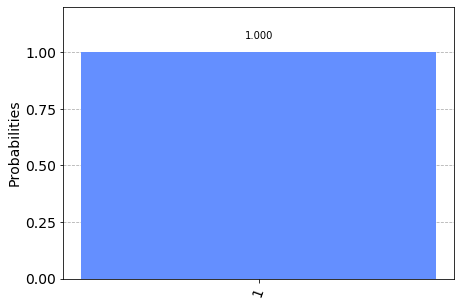

In [2]:
qi=QuantumRegister(4)
qs=QuantumRegister(2)
qb=QuantumRegister(2)
qe=QuantumRegister(4)
qxs=QuantumRegister(2)
qo=QuantumRegister(1)
c=ClassicalRegister(1)

circuit=QuantumCircuit(qi,qs,qb,qe,qxs,qo,c)

def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)
    
def or_3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)
    
def fun_and(qc,q0,q1,q2):
    qc.ccx(q0,q1,q2)
    
def and_3(qc,q0,q1,q2,b,q3):
    fun_and(qc,q0,q1,b)
    fun_and(qc,b,q2,q3)
    qc.reset(b)
    
def or_4(qc,q0,q1,q2,q3,b1,b2,q4):
    or_3(qc,q0,q1,q2,b1,b2)
    fun_or (qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)
    
circuit.x(qi[0])
circuit.x(qi[2])
circuit.x(qi[3])

circuit.x(qs[1])

for i in range(0,2):
    circuit.cx(qs[i],qxs[i])
    circuit.x(qxs[i])
    
and_3(circuit,qxs[0],qxs[1],qi[0],qb[0],qe[0])
and_3(circuit,qs[0],qxs[1],qi[1],qb[0],qe[1])
and_3(circuit,qxs[0],qs[1],qi[2],qb[0],qe[2])
and_3(circuit,qs[0],qs[1],qi[3],qb[0],qe[3])

or_4(circuit,qe[0],qe[1],qe[2],qe[3],qb[0],qb[1],qo[0])

circuit.measure(qo[0],c[0])

job = execute(circuit,simulator,shots=100)
result=job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)


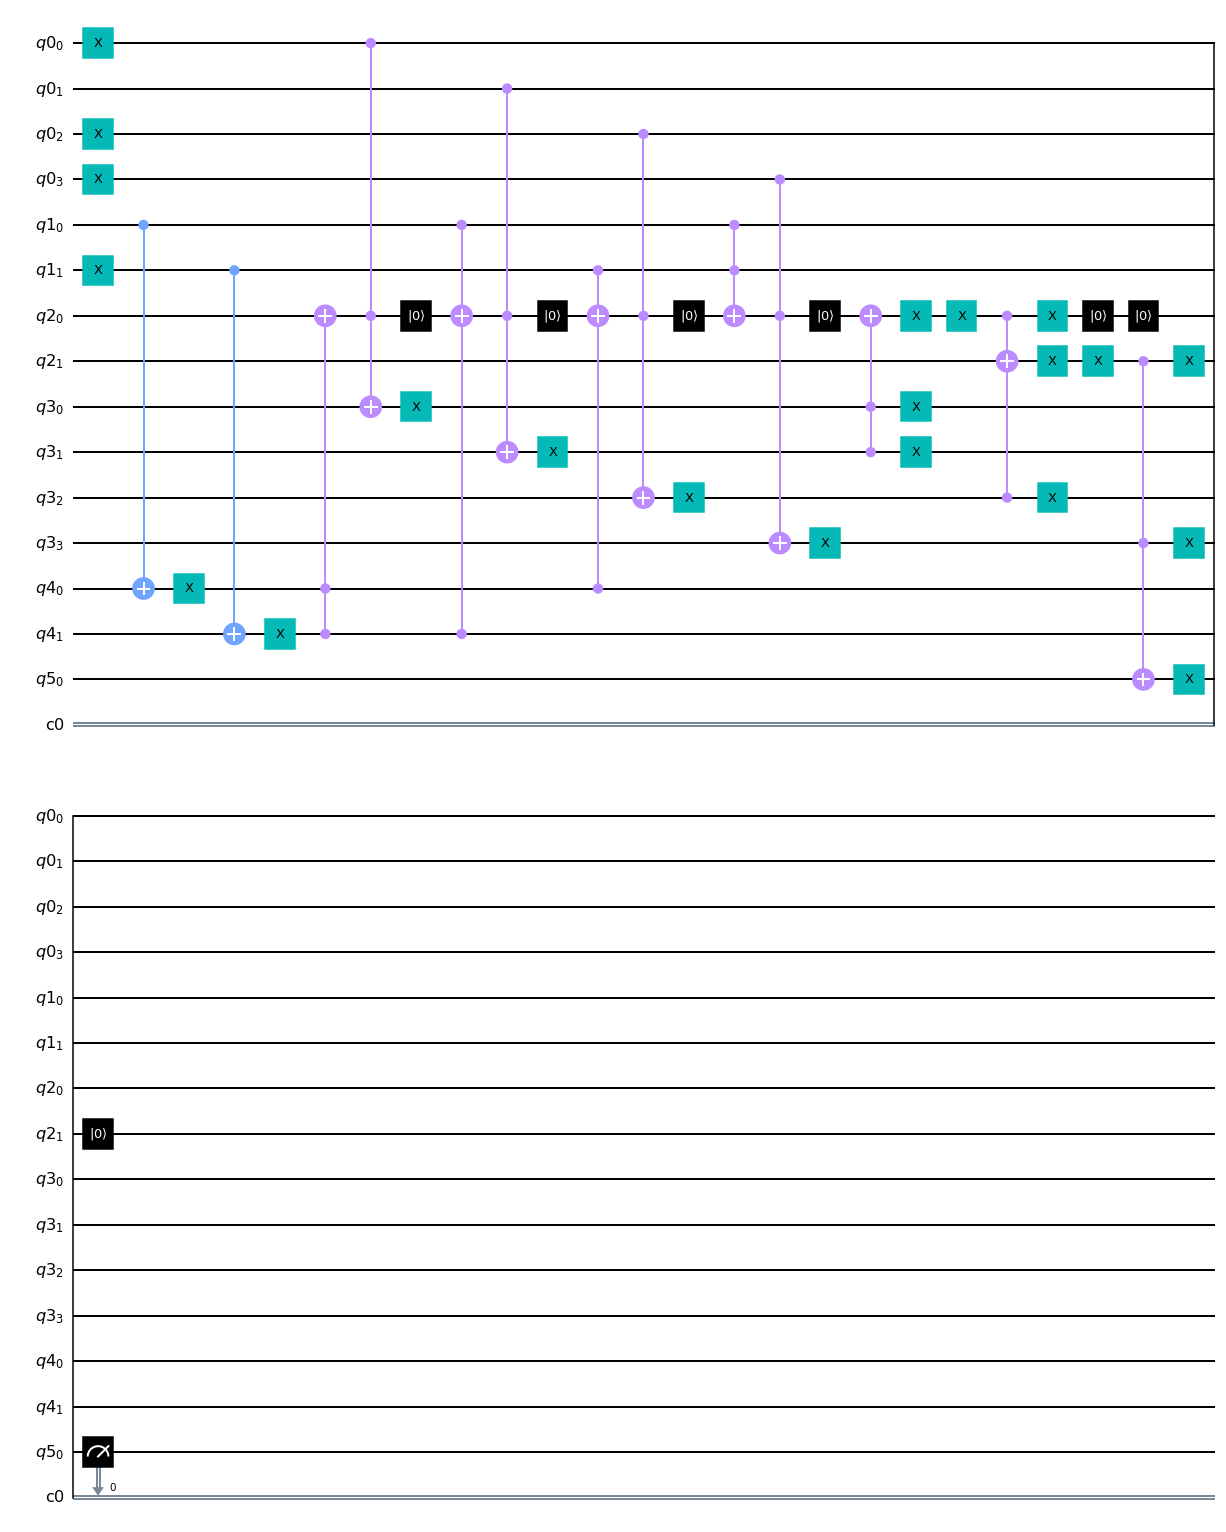

In [3]:
circuit.draw(output='mpl')